# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [3]:
# import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statistics import covariance
from sklearn import linear_model

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [23]:
# Your code here.

student_data = pd.DataFrame({"Age": [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], "Tardies": [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

Draw a dispersion diagram (scatter plot) for the data.

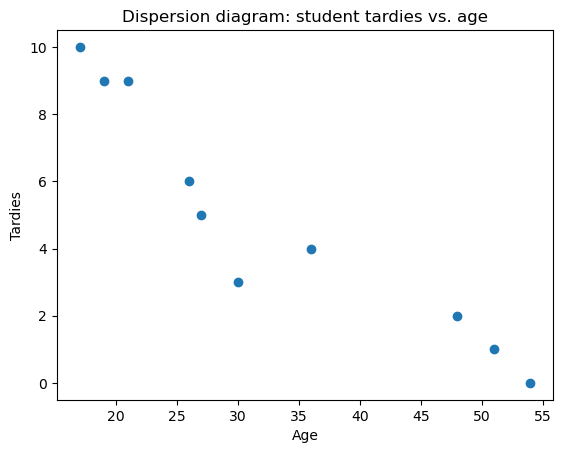

In [25]:
# Your code here.

x = student_data[["Age"]]
y = student_data["Tardies"]

plt.title("Dispersion diagram: student tardies vs. age")
plt.xlabel("Age")
plt.ylabel("Tardies")

plt.scatter(x, y)
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here.

# There is a trend for the number of tardies to decrease as the age of the student increases
# There seems to be a linear relationship with a negative slope

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [45]:
# Your response here.

#correlation:
print(student_data.corr()) # print(student_data["Age"].corr(student_data["Tardies"])); by default: Pearson correlation

#covariance:
print(student_data.cov())

# comments
'''Correlation (Pearson) is a measure of the direction and strength of the linear relationship between two variables.
Correlation is a relative measure (can be used to compare different measures/datasets). 
A value close to +1 indicates a strong linear relationship while negative values indicate anti-correlation.

Covariance is a measure of the direction of the linear relationship (only) between two variables.
A negative covariance indicates an anti-correlation between the variables.

In this instance, a strongly negative (-0.94) correlation (Pearson) indicates a negative linear relationship between the two
variables (age and number of tardies). The value of covariance (-45.57) further points to the negative direction of this
relationship.'''

              Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000
                Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444


'Correlation (Pearson) is a measure of the direction and strength of the linear relationship between two variables.\nCorrelation is a relative measure (can be used to compare different measures/datasets). \nA value close to +1 indicates a strong linear relationship while negative values indicate anti-correlation.\n\nCovariance is a measure of the direction of the linear relationship (only) between two variables.\nA negative covariance indicates an anti-correlation between the variables.\n\nIn this instance, a strongly negative (-0.94) correlation (Pearson) indicates a negative linear relationship between the two\nvariables (age and number of tardies). The value of covariance (-45.57) further points to the negative direction of this\nrelationship.'

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [46]:
# Your response here.

model = linear_model.LinearRegression()
result = model.fit(x, y)

# Linear regresion (Pearson correlation ~1). Outcome variable is y (a prediction of tardies) as a function of x (age)

Plot your regression model on your scatter plot.

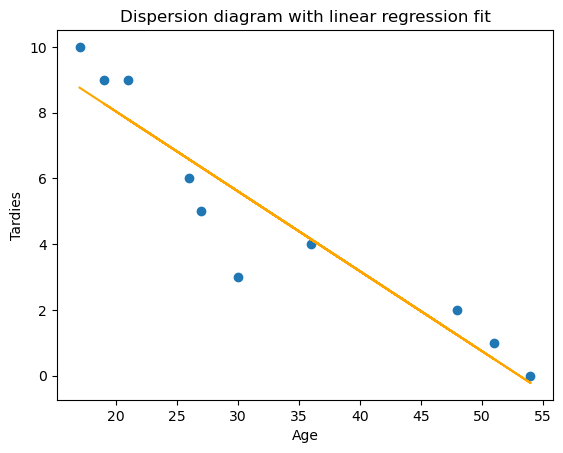

In [47]:
# Your code here.

regression_line = result.intercept_ + result.coef_[0] * x

plt.title("Dispersion diagram with linear regression fit")
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.plot(x, regression_line, c = "orange")
plt.scatter(x, y)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [48]:
# Your response here.

print(model.score(x, y))

# age is a good predictor of tardiness
# the model has a high coefficient of determination (R^2) of 0.88 indicating 
# that the fit is very close to linear
# in total, 88% of the variance in tardies can therefore be explained by the age correlation

0.8820265558250109


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [75]:
# Import any libraries you may need & the data

vehicles = pd.read_csv("vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

<Axes: >

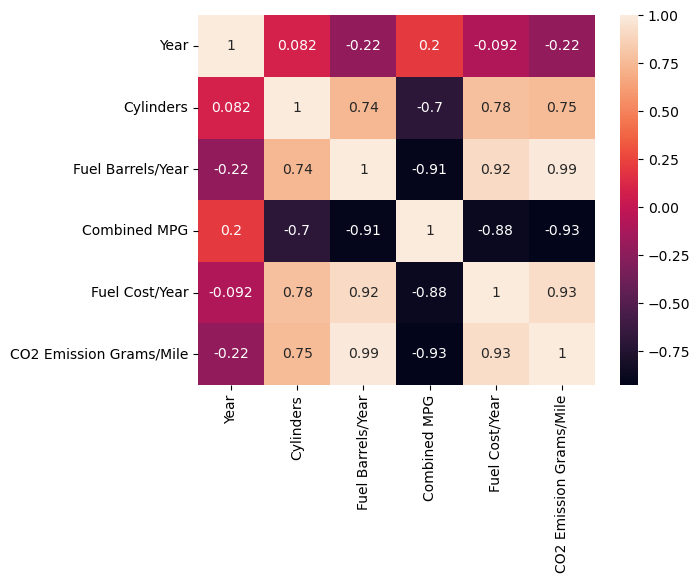

In [76]:
# Your response here.

variables = ["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year", "CO2 Emission Grams/Mile"]

vehicles_corr = vehicles[variables].corr()

sns.heatmap(vehicles_corr, annot=True)

In [77]:
'''
The most correlated variables to CO2 emissions are:
on positive correlation Fuel Barrels/Year (0.99), Fuel Cost/Year (0.93)
on negative correlation Combined MPG (negative) (-0.93)

The least amount of info is provided by Year (-0.22), followed by Cylinders (0.75)
'''

'\nThe most correlated variables to CO2 emissions are:\non positive correlation Fuel Barrels/Year (0.99), Fuel Cost/Year (0.93)\non negative correlation Combined MPG (negative) (-0.93)\n\nThe least amount of info is provided by Year (-0.22), followed by Cylinders (0.75)\n'

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [109]:
# Your response here.

# i will use a regression model for the most correlated variables
# start with Fuel Barrels/Year (correlation of 0.99)
# then add Fuel Cost/Year (0.93) and Combined MPG (-0.93)

x = vehicles[["Fuel Barrels/Year", "Fuel Cost/Year", "Combined MPG", "Cylinders", "Year"]]
y = vehicles["CO2 Emission Grams/Mile"]

model = linear_model.LinearRegression()
result = model.fit(x, y)
model.score(x, y)

# Just Fuel Barrels/Year already gives an R^2 of 0.97
# Fuel Cost/Year (on its own 0.87) and Combined MPG (0.86) bring that to 0.98
# Cylinders (0.57) and Year (0.05) don't show any further improvement

0.9808734920269122

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [111]:
# Your response here. 

coefficients = model.coef_
intercept = model.intercept_

coefficients_df = pd.DataFrame({'Variable': x.columns, 'Coefficient': coefficients})
coefficients_df.set_index('Variable', inplace=True)
coefficients_df = coefficients_df.sort_values('Coefficient', ascending=False)
coefficients_df.head()

# Fuel Barrels/Year indeed is the most important variable, followed by Combined MPG
# Cylinders seems to be more important than Fuel Cost/Year
# which seems to be quite irrelevant (even more than Year)

,Coefficient
Variable,
Fuel Barrels/Year,19.052925
Cylinders,1.878800
Fuel Cost/Year,0.032309
Year,-0.320617
Combined MPG,-3.040399


## Challenge 3: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [4]:
people_df = pd.DataFrame({"invited": [1, 3, 4, 6, 8, 9, 11, 14], "attended": [1, 2, 4, 4, 5, 7, 8, 13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

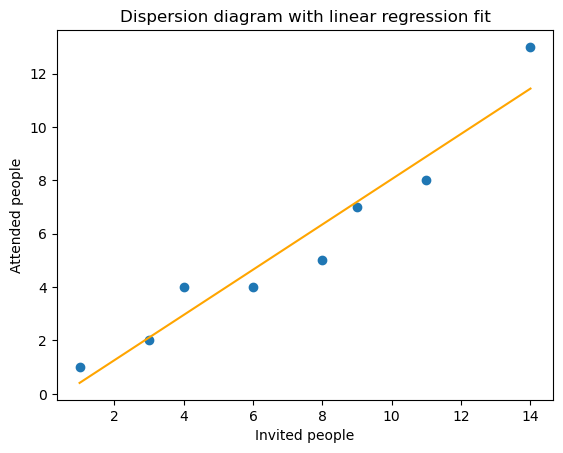

In [5]:
x = people_df[["invited"]]
y = people_df["attended"]

model = linear_model.LinearRegression()
result = model.fit(x, y)

regression_line = result.intercept_ + result.coef_[0] * x

plt.title("Dispersion diagram with linear regression fit")
plt.xlabel("Invited people")
plt.ylabel("Attended people")
plt.plot(x, regression_line, c = "orange")
plt.scatter(x, y)

plt.show()

In [6]:
people_df.corr()

,invited,attended
invited,1.00000,0.96523
attended,0.96523,1.00000


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [15]:
print(model.score(x, y))

print(y)

model_invited = pd.DataFrame([1, 3, 4, 6, 8, 9, 11, 14], columns = ["invited"])

print(model.predict(model_people))

# positive relationship between number of people invited and attending 

0.9316696375519905
0     1
1     2
2     4
3     4
4     5
5     7
6     8
7    13
Name: attended, dtype: int64
[ 0.40909091  2.10606061  2.95454545  4.65151515  6.34848485  7.1969697
  8.89393939 11.43939394]


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

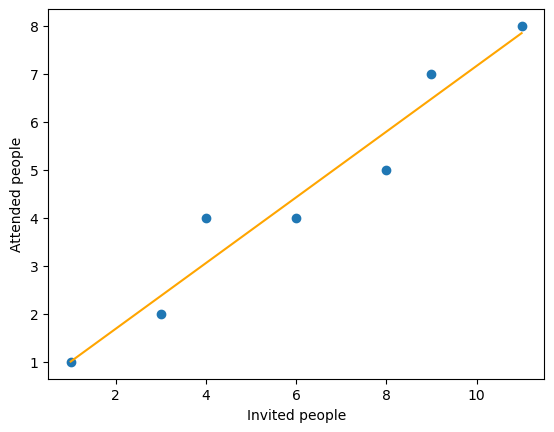

0.9433811802232855


In [21]:
# Your response here. 
people_df = pd.DataFrame({"invited": [1, 3, 4, 6, 8, 9, 11], "attended": [1, 2, 4, 4, 5, 7, 8]})

x = people_df[["invited"]]
y = people_df["attended"]

model = linear_model.LinearRegression()
result = model.fit(x, y)

regression_line = result.intercept_ + result.coef_[0] * x

plt.plot(x, regression_line, c = "orange")
plt.scatter(x, y)

plt.xlabel("Invited people")
plt.ylabel("Attended people")

plt.show()

print(model.score(x, y))

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [113]:
# Your response here.
# I don't know what to comment on that
# The fit improves (but only slightly 0.93 -> 0.94)